In [1]:
import math
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eval_set = np.load('/home/micl/workspace/lmh_data/sclab/eval_dataset.npy', allow_pickle=True)
preds = np.load('/home/micl/workspace/lmh_data/sclab/tmp/evaluate.npy', allow_pickle=True)

In [3]:
def _process(_array, use_diag=False):
    _indexs = [0, 23, 46, 69, 92, 115, 138, 161, 184, 207, 230, 253, 276, 299, 322, 345, 368, 391, 414, 437, 460, 483]
    if not use_diag:
        _indexs = list(set(range(0, len(_array))) - set(_indexs))
    return _array[_indexs]

def mat2array(mat):
    return mat[np.triu_indices_from(mat, k=0)]

def array2mat(array):
    _len, a = len(array), 0
    while _len:
        a += 1
        _len -= a
    _len = a

    mat, a = np.zeros((_len, _len)), 0
    for i in range(_len):
        mat[i, i:] = array[a:a+_len-i]
        a += _len - i
    return mat + np.triu(mat, k=1).T

def _draw(mat, ignore_diag=True):
    fig = plt.figure(figsize=[7, 7])
    ax = fig.add_subplot()
#     ax.set_title('{}:{}-{}.{}.{}'.format(chrom, start, end, strand, cell_type))
    if ignore_diag:
        np.fill_diagonal(mat, 0)
    sns.heatmap(mat, cmap='Reds_r', square=True)

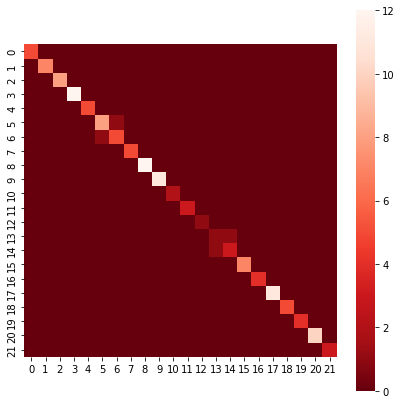

In [4]:
_target = preds[0]['target']
_draw(array2mat(_target), ignore_diag=False)

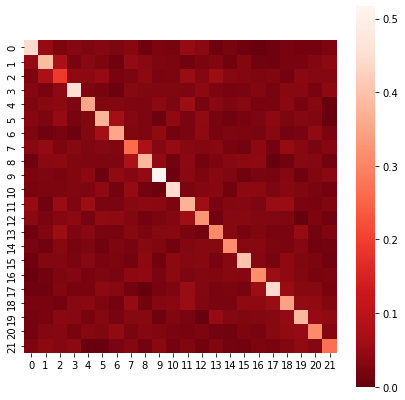

In [5]:
_predict = preds[0]['predict']
_predict += abs(_predict.min())
_draw(array2mat(_predict), ignore_diag=False)

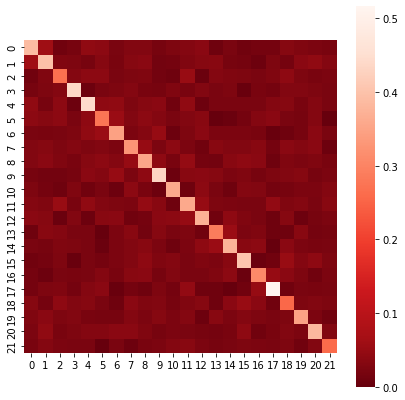

In [6]:
_predict = preds[100]['predict']
_predict += abs(_predict.min())
_draw(array2mat(_predict), ignore_diag=False)

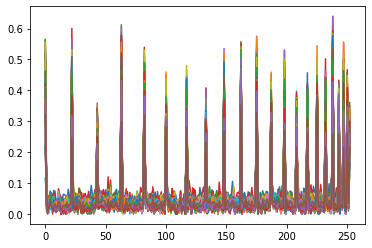

In [7]:
for pred in preds:
    _pred = pred['predict']
    _pred += abs(_pred.min())
#     _pred = _process(_pred, True)
#     _pred = np.log1p(_pred)
    plt.plot(list(range(0, _pred.shape[0])), _pred)
plt.show()

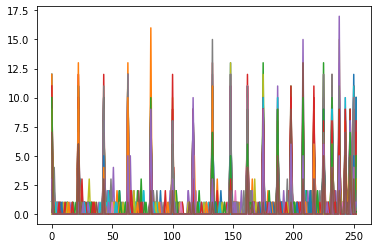

In [8]:
for pred in preds:
    _pred = pred['target']
#     _pred = _process(_pred, True)
#     _pred = np.log1p(_pred)
    plt.plot(list(range(0, _pred.shape[0])), _pred)
plt.show()

In [9]:
def show_by_cell_type(cell_type):
    _pred, _target = None, None
    num = 0
    for i in range(len(preds)):
        pred = preds[i]
        if eval_set[i]['cell_type'] != cell_type:
            continue
        num += 1
        if _pred is None:
            _pred, _target = pred['predict'].copy(), pred['target'].copy()
        else:
            _pred += pred['predict']
            _target += pred['target']
    return _pred/num, _target/num

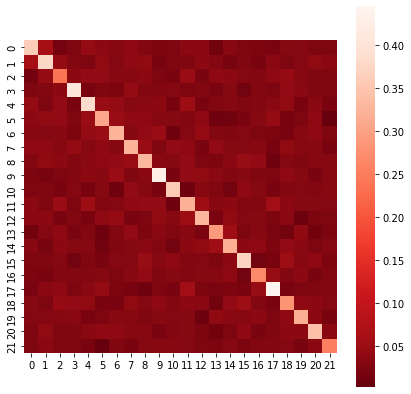

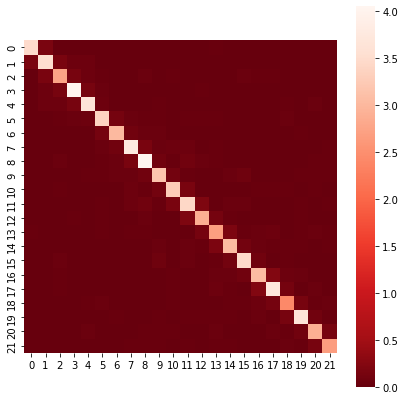

In [10]:
_pred, _target = show_by_cell_type('Astro')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

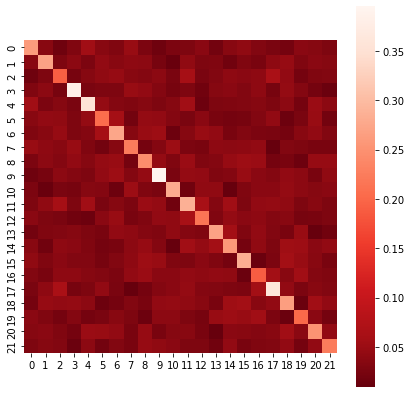

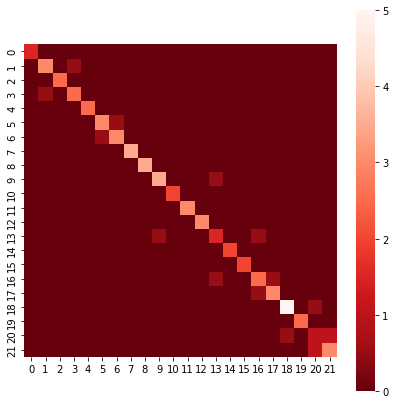

In [11]:
_pred, _target = show_by_cell_type('Endo')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

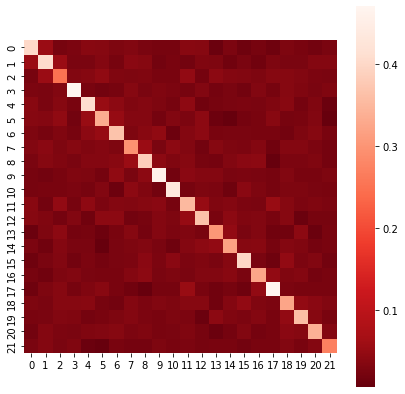

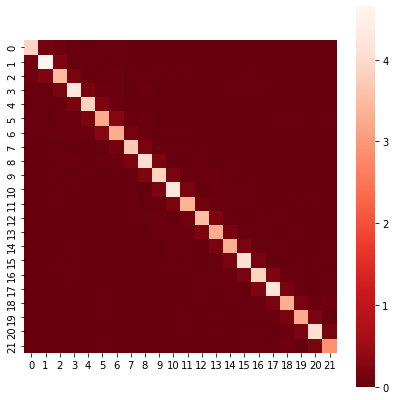

In [12]:
_pred, _target = show_by_cell_type('ODC')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

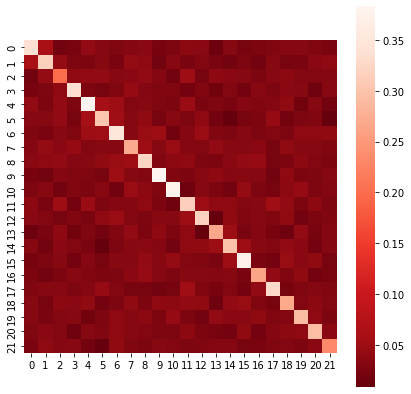

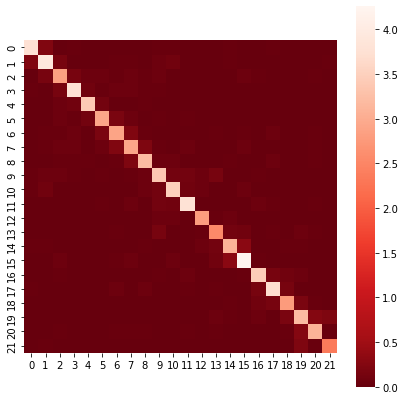

In [13]:
_pred, _target = show_by_cell_type('OPC')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

In [14]:
def cal_by_cell_type(cell_type):
    _values = []
    for i in range(len(preds)):
        pred = preds[i]
        if eval_set[i]['cell_type'] != cell_type:
            continue
        _values.append(stats.pearsonr(pred['predict'], pred['target'])[0])
    return _values

In [15]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: (0.9847507213322542, 1.1699763153988693e-192)
Endo: (0.90982972936556, 7.372859745387338e-98)
ODC: (0.9877533872624791, 1.575721309830106e-204)
OPC: (0.9840075352638932, 4.382129618860776e-190)


In [16]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    _pred, _target = array2mat(_pred), array2mat(_target)
    np.fill_diagonal(_pred, 0)
    np.fill_diagonal(_target, 0)
    _pred, _target = mat2array(_pred), mat2array(_target)
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: (0.27863192394159536, 6.814957176992175e-06)
Endo: (0.16685750912404002, 0.007824309122164771)
ODC: (0.361461665216097, 3.1731835132119846e-09)
OPC: (0.3036180931782049, 8.56158810985372e-07)


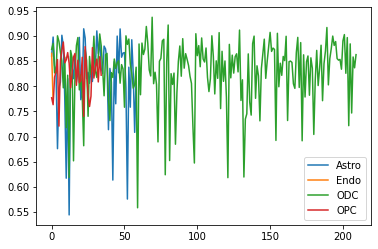

In [17]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _values = cal_by_cell_type(cell_type)
    plt.plot(list(range(0, len(_values))), _values, label=cell_type)

plt.legend()
plt.show()

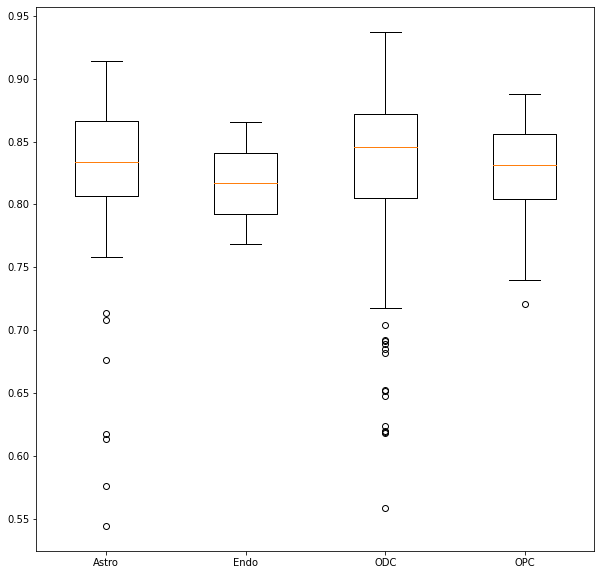

In [18]:
plot_values = [cal_by_cell_type(cell_type) for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']]
fig, ax = plt.subplots(figsize=(10,10))

ax.boxplot(plot_values, labels=['Astro', 'Endo', 'ODC', 'OPC'])

plt.show()

In [19]:
def test(cell_type):
    array = show_by_cell_type(cell_type)[1]
    mat = array2mat(array)
    np.fill_diagonal(mat, 0)
    return mat2array(mat)
plot_values = [test(cell_type) for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']]
print(stats.pearsonr(plot_values[0], plot_values[1]))
print(stats.pearsonr(plot_values[0], plot_values[2]))
print(stats.pearsonr(plot_values[0], plot_values[3]))
print(stats.pearsonr(plot_values[1], plot_values[2]))
print(stats.pearsonr(plot_values[1], plot_values[3]))
print(stats.pearsonr(plot_values[2], plot_values[3]))

(0.30354621704800555, 8.615286679071825e-07)
(0.8462815207147346, 1.342735443484449e-70)
(0.6186975750879367, 4.0466423657835525e-28)
(0.3026903056007719, 9.280028990931044e-07)
(0.15325173657902144, 0.014688172035356948)
(0.7033903410330115, 4.384518773508668e-39)


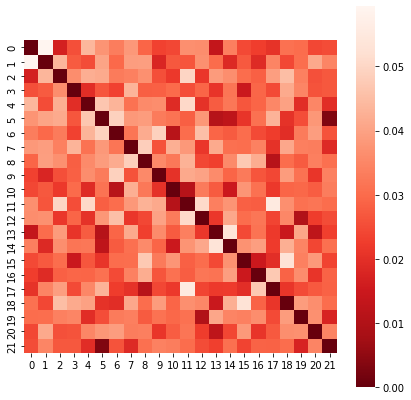

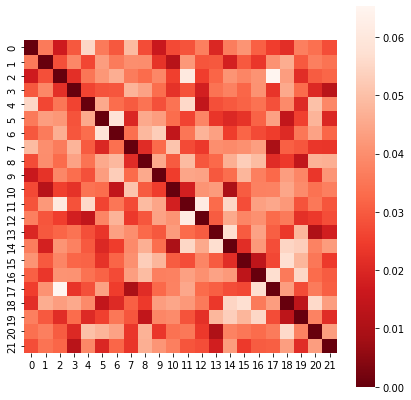

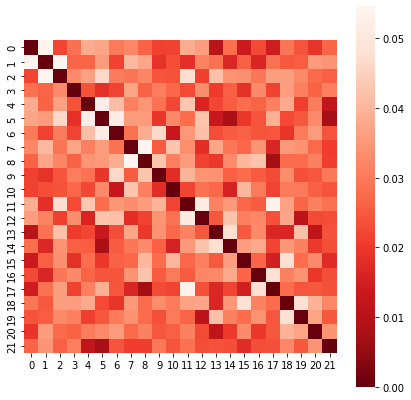

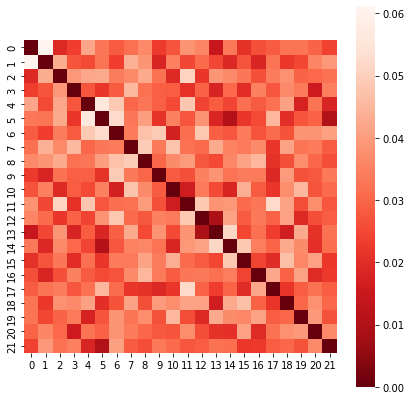

In [20]:
_draw(array2mat(show_by_cell_type('Astro')[0]), ignore_diag=True)
_draw(array2mat(show_by_cell_type('Endo')[0]), ignore_diag=True)
_draw(array2mat(show_by_cell_type('ODC')[0]), ignore_diag=True)
_draw(array2mat(show_by_cell_type('OPC')[0]), ignore_diag=True)

In [21]:
import anndata
import scanpy as sc

results, cell_types = [], []
for i in range(len(preds)):
    results.append(preds[i]['predict'])
    cell_types.append(eval_set[i]['cell_type'])
results, cell_types = np.array(results), np.array(cell_types)

results = anndata.AnnData(X = results)
results.obs['cell_type'] = cell_types
results

AnnData object with n_obs × n_vars = 306 × 253
    obs: 'cell_type'

In [22]:
sc.tl.pca(results, n_comps=100, svd_solver="auto")
sc.pp.neighbors(results, metric="cosine")
sc.tl.umap(results)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


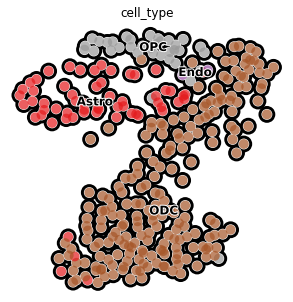

In [23]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(results, color=['cell_type'], add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2, frameon=False, palette='Set1')